In [234]:
# Data Wrangling

In [235]:
# importing packages
from pandas import *
# loading Data
df=read_csv('E:\GetHub\EDA-for-Medical-Appointment\medical-appointments.csv')

In [236]:
# lets see first 5 rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [237]:
# lets explore column’s Data type
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [238]:
# lets see the dimensions of the data fram
print("data fram has dimension row X columns ",df.shape)

data fram has dimension row X columns  (110527, 14)


In [239]:
# check for missing values in each column
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [240]:
# check for duplicates rows
df.duplicated().sum()

0

In [241]:
# check if there is age<=0
(df['Age']<=0).any()

True

In [242]:
# Data cleaning

In [243]:
#convert ScheduledDay and AppointmentDay data type to date time
df['ScheduledDay']=to_datetime(df['ScheduledDay'])
df['AppointmentDay']=to_datetime(df['AppointmentDay'])

# check for updates
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [244]:
# Drop rows with age=0 as there is no person whose age=0
df.drop(df.index[df['Age']<=0],inplace=True)

# check for updates
(df['Age']<=0).any()

False

In [245]:
# Exploratory Data Analysis (EDA)

In [246]:
# Descriptive statistics for each column
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264
std,2.558267e+14,7.133274e+04,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172463e+13,5.680744e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433600e+13,5.725634e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [247]:
#Describtion of non numerical columns
df.describe(include='O')

,Gender,Neighbourhood,No-show
count,106987,106987,106987
unique,2,81,2
top,F,JARDIM CAMBURI,No
freq,70118,7586,85307


In [248]:
# somevisualizations 
import matplotlib.pyplot as plt

(-1.1597313915608074,
 1.1519784504143789,
 -1.2060062062225492,
 1.202005602886256)

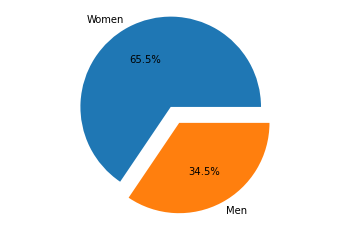

In [249]:
# Which category goes to the doctor more, is it Men or women?
NumberOfWoman=(df['Gender']=='F').sum()
NumberOfMen=(df['Gender']=='M').sum()
plt.pie([NumberOfWoman,NumberOfMen],labels=['Women','Men'],autopct ='%1.1f%%',explode=[0.1,0.1])
plt.axis('equal')

Gender  No-show
F       No         55843
        Yes        14275
M       No         29464
        Yes         7405
Name: Gender, dtype: int64


(-1.158784490386685,
 1.1528184450470227,
 -1.2033424443390381,
 1.2002931704152309)

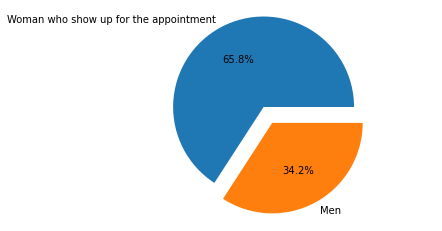

In [250]:
# Who is more punctual, men or women? 
x=df.groupby(['Gender','No-show'])['Gender'].count()
print(x)
# visualizing the result 
plt.pie([x[1],x[3]],labels=['Woman who show up for the appointment','Men'],autopct ='%1.1f%%',explode=[0.1,0.1])
plt.axis('equal')

the most frequent age is :  1


(array([1.7497e+04, 1.4989e+04, 1.6978e+04, 1.6042e+04, 1.7215e+04,
        1.4969e+04, 6.4450e+03, 2.6960e+03, 1.5100e+02, 5.0000e+00]),
 array([  1. ,  12.4,  23.8,  35.2,  46.6,  58. ,  69.4,  80.8,  92.2,
        103.6, 115. ]),
 <BarContainer object of 10 artists>)

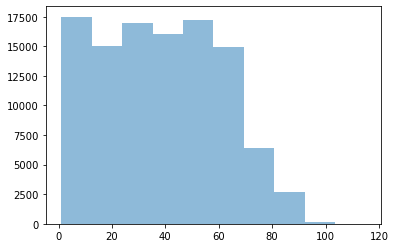

In [262]:
# what is the most frequent age?
print('the most frequent age is : ',df['Age'].mode()[0])   
plt.hist(df['Age'],label='Age',alpha=0.5)    

In [258]:
# What is the age group most affected by diabetes?

df.groupby(['Diabetes','Age'])['Diabetes'].count()

Diabetes  Age
False     1      2272
          2      1617
          3      1513
          4      1298
          5      1489
                 ... 
True      95        4
          96        2
          97        1
          98        2
          99        1
Name: Diabetes, Length: 193, dtype: int64

In [265]:
print('The schedule Day begin from {} and end in {}'.format(df['ScheduledDay'].min(),df['ScheduledDay'].max()))

The schedule Day begin from 2015-11-10 07:13:56+00:00 and end in 2016-06-08 20:07:23+00:00


In [267]:
print('The Appointment Day begin from {} and end in {}'.format(df['AppointmentDay'].min(),df['AppointmentDay'].max()))


The Appointment Day begin from 2016-04-29 00:00:00+00:00 and end in 2016-06-08 00:00:00+00:00
